In [2]:
import pandas as pd
import numpy as np
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf

In [3]:
dataset=pd.read_csv("Tatacoffee13_21.csv", parse_dates=['Date'], index_col='Date')
dataset

,Open,High,Low,Close
Date,,,,
2013-01-01,1410.60,1427.90,1408.30,1415.10
2013-01-02,1421.00,1626.60,1416.15,1607.40
2013-01-03,1632.55,1673.90,1613.05,1626.20
2013-01-04,1627.75,1627.75,1574.60,1579.05
2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...
2021-12-22,202.90,207.80,201.35,205.00
2021-12-23,206.00,206.85,202.05,202.95
2021-12-24,203.90,203.90,199.35,201.00


In [4]:
column="Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data = Ms.fit_transform(dataset[[column]])
print("Len:", data.shape)

Len: (2225, 1)


In [6]:
training_size = round(len(data) * 0.80)
print(training_size)
x_train=data[:training_size]
x_test=data[training_size:]
print("x_train Length:", x_train.shape)
print("x_test Length:", x_test.shape)
y_train=data[:training_size]
y_test=data[training_size:]A
print("y_train Length:", y_train.shape)
print("y_test Length:", y_test.shape)

1780
x_train Length: (1780, 1)
x_test Length: (445, 1)
y_train Length: (1780, 1)
y_test Length: (445, 1)


In [18]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
trends=['add', 'mul', None]
seasonal_period=[2,3,4,5]
for i in seasonal_period:
    for td in trends:
        model = ExponentialSmoothing(x_train, trend=td, seasonal='add', seasonal_periods=i)
        model_fit = model.fit()
        y_pred = model_fit.predict(len(x_train), len(data)-1)
        from stockFunctions import rmsemape
        print("Seasonal_period={}, Trend={}".format(i, td))
        rmsemape(y_test, y_pred)
        print("*************") 

Seasonal_period=2, Trend=add
RMSE-Testset: 0.17544989728204466
maPe-Testset: 73651595235.98802
*************


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Seasonal_period=2, Trend=mul
RMSE-Testset: 0.07300321129629966
maPe-Testset: 99670051606.06288
*************
Seasonal_period=2, Trend=None
RMSE-Testset: 0.05433175731397766
maPe-Testset: 107329914271.85901
*************


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Seasonal_period=3, Trend=add
RMSE-Testset: 0.17425467267904618
maPe-Testset: 74617638307.76044
*************


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Seasonal_period=3, Trend=mul
RMSE-Testset: 0.06873264196659096
maPe-Testset: 101946905033.8046
*************
Seasonal_period=3, Trend=None
RMSE-Testset: 0.054210298393882785
maPe-Testset: 107913787057.6133
*************


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Seasonal_period=4, Trend=add
RMSE-Testset: 0.17607711707522647
maPe-Testset: 74615619168.38876
*************


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Seasonal_period=4, Trend=mul
RMSE-Testset: 0.06778961956697956
maPe-Testset: 102884803116.8364
*************
Seasonal_period=4, Trend=None
RMSE-Testset: 0.054155419466573214
maPe-Testset: 108425482304.60382
*************


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Seasonal_period=5, Trend=add
RMSE-Testset: 0.17602280973445525
maPe-Testset: 67404028634.05307
*************


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Seasonal_period=5, Trend=mul
RMSE-Testset: 0.06646091124397956
maPe-Testset: 96234529410.66106
*************
Seasonal_period=5, Trend=None
RMSE-Testset: 0.054861636481584604
maPe-Testset: 100936534047.58011
*************


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


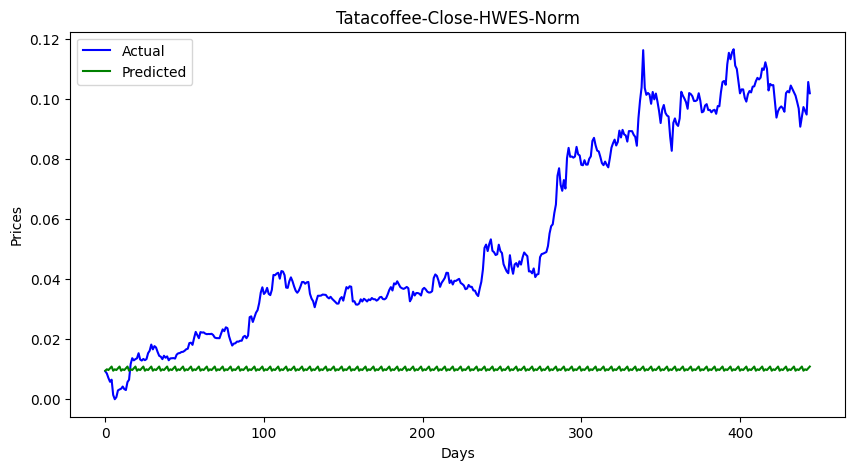

In [8]:
from stockFunctions import graph
graph(y_test, y_pred, "Actual", "Predicted", "Tatacoffee-Close-HWES-Norm", "Days", "Prices")

In [9]:
from stockFunctions import conversionSingle
HWES_Norm_Test_Table=conversionSingle(y_test, [column])
actual_stock_price_test_origi=Ms.inverse_transform(HWES_Norm_Test_Table)
actual_stock_price_test_origi

array([[ 64.3 ],
       [ 63.1 ],
       [ 60.7 ],
       [ 58.7 ],
       [ 59.8 ],
       [ 51.65],
       [ 49.4 ],
       [ 50.5 ],
       [ 54.1 ],
       [ 54.6 ],
       [ 55.  ],
       [ 56.15],
       [ 54.8 ],
       [ 54.3 ],
       [ 58.5 ],
       [ 59.8 ],
       [ 68.1 ],
       [ 71.25],
       [ 70.1 ],
       [ 70.75],
       [ 71.2 ],
       [ 73.9 ],
       [ 70.55],
       [ 70.  ],
       [ 70.85],
       [ 70.2 ],
       [ 70.8 ],
       [ 73.95],
       [ 75.25],
       [ 78.5 ],
       [ 75.95],
       [ 77.7 ],
       [ 76.95],
       [ 74.55],
       [ 72.5 ],
       [ 72.05],
       [ 70.75],
       [ 72.55],
       [ 71.5 ],
       [ 72.2 ],
       [ 70.15],
       [ 71.15],
       [ 71.2 ],
       [ 71.3 ],
       [ 71.05],
       [ 73.15],
       [ 73.85],
       [ 74.  ],
       [ 74.55],
       [ 74.65],
       [ 75.2 ],
       [ 76.  ],
       [ 76.3 ],
       [ 79.3 ],
       [ 79.5 ],
       [ 78.35],
       [ 82.05],
       [ 85.25],
       [ 83.55

In [10]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_origi,[column])
actual_stock_price_test_oriA

,Close
0,64.3
1,63.1
2,60.7
3,58.7
4,59.8
...,...
440,205.0
441,202.95
442,201.0
443,218.35


In [11]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

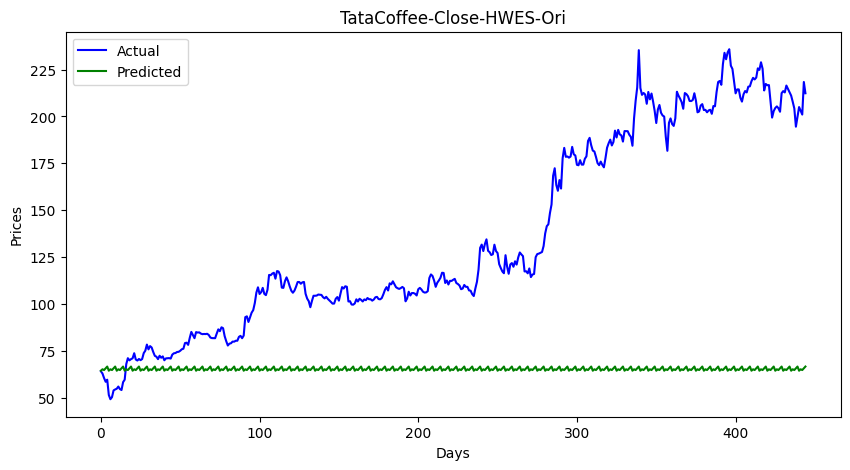

In [12]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-HWES-Ori","Days","Prices")

In [13]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 87.71278440675745
maPe-Testset: 0.4510882136568801


C:\Anaconda3\envs\aiml\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [14]:
forecast=model_fit.predict(len(data), len(data)+3)
forecast

array([0.00950151, 0.00997352, 0.0097185 , 0.01032788])

In [15]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [16]:
forecast_stock_price_test_oriF

,Closefore
0,64.591014
1,65.34567
2,64.937943
3,65.912219


In [17]:
forecast_stock_price_test_oriF.to_csv("CloseHWES.csv",index=False)